## Data Preprocessing
Understanding the data is the foundation of any machine learning workflow. Before applying models, it is important to explore the dataset, assess its quality, and make informed decisions about how to prepare it. This stage directly influences how we frame our research questions, design our models, and ultimately evaluate their effectiveness.

#### The data itself 
The dataset was obtained from Kaggle and contains over 18,000 Spotify tracks, combining audio features, metadata, and lyrics. Each entry includes numerical attributes such as danceability, energy, and valence, alongside categorical information such as playlist genre and textual data like lyrics. Understanding the diversity and limitations of these features is essential, since some are directly linked to audio properties while others reflect external or contextual factors.

https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs

In [1]:
# IMPORTS
# Data manipulation
import pandas as pd
import numpy as np  

# Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# For handling missing values/outliers if needed
from sklearn.impute import SimpleImputer  
from scipy import stats  


#### Data Overview
In this section, we examine the overall structure and characteristics of the dataset. This involves checking data types, dimensions, and basic statistics in order to understand how each feature is represented. By exploring measures such as mean, standard deviation, and range, we can begin to identify which variables are on comparable scales, which may require transformation, and which show strong variation across tracks. The goal here is to build an initial understanding of the dataset’s shape and highlight areas that may need further cleaning or preprocessing before modeling.

In [ ]:
# Load the dataset
df = pd.read_csv('/Users/mariamodubayo/spotify-ml-challenge/spotify-ml-challenge/data/spotify_songs.csv')

In [12]:
# Display the first few rows of the dataset
df.head(3)

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en


In [13]:
# quick overview of the dataset
df.shape, df.info(), df.describe(), df.columns, df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

((18454, 25),
 None,
        track_popularity  danceability        energy           key  \
 count      18454.000000  18454.000000  18454.000000  18454.000000   
 mean          42.438821      0.644066      0.692289      5.342094   
 std           24.616740      0.150071      0.180635      3.613121   
 min            0.000000      0.098500      0.016700      0.000000   
 25%           24.000000      0.546000      0.573000      2.000000   
 50%           48.000000      0.660000      0.715000      6.000000   
 75%           62.000000      0.755000      0.835000      9.000000   
 max          100.000000      0.979000      1.000000     11.000000   
 
            loudness          mode   speechiness  acousticness  \
 count  18454.000000  18454.000000  18454.000000  18454.000000   
 mean      -6.769159      0.580525      0.106192      0.175348   
 std        2.920757      0.493487      0.102291      0.217795   
 min      -34.283000      0.000000      0.022400      0.000001   
 25%       -8.249

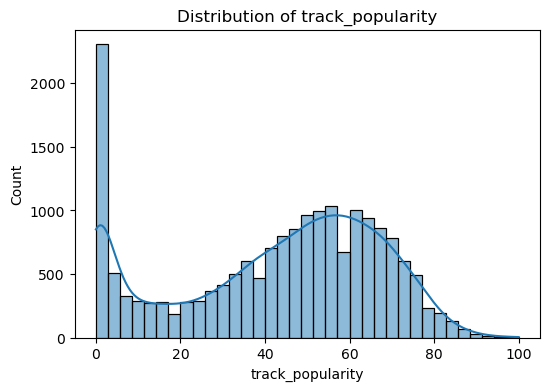

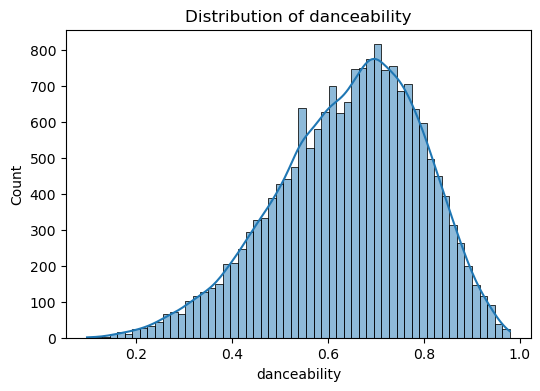

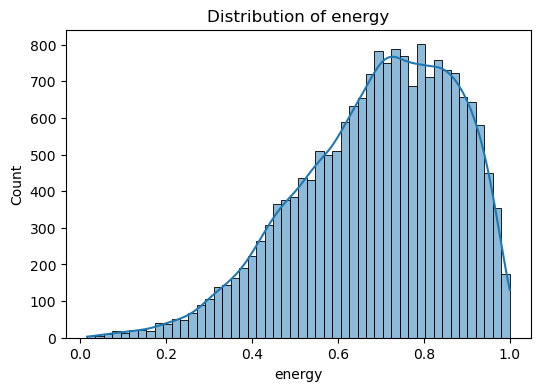

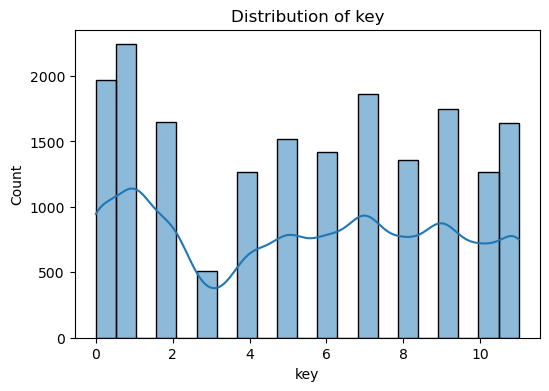

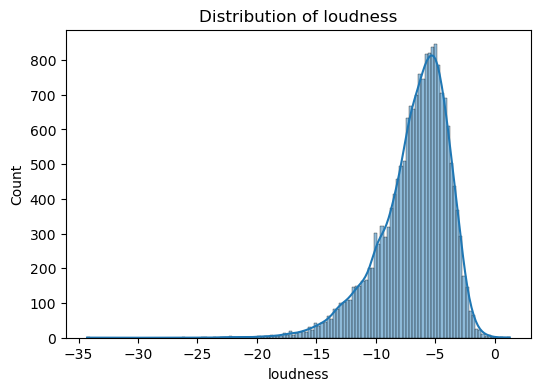

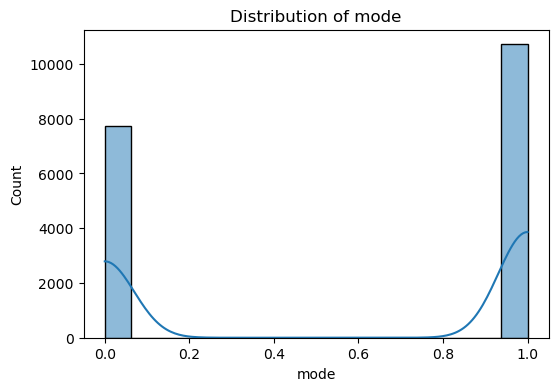

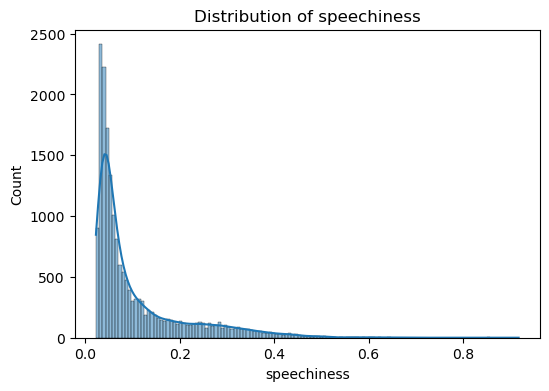

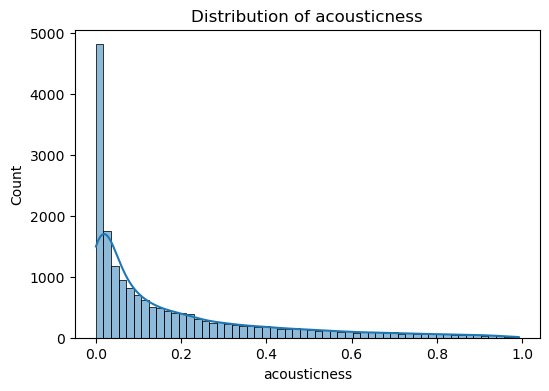

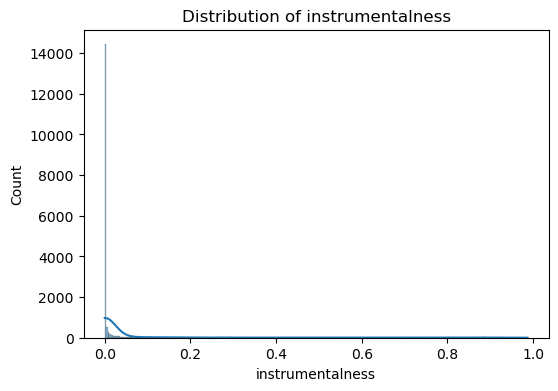

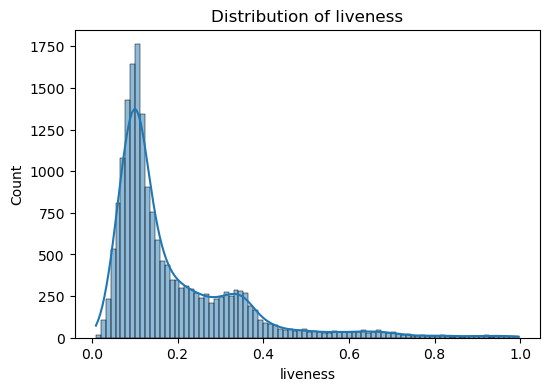

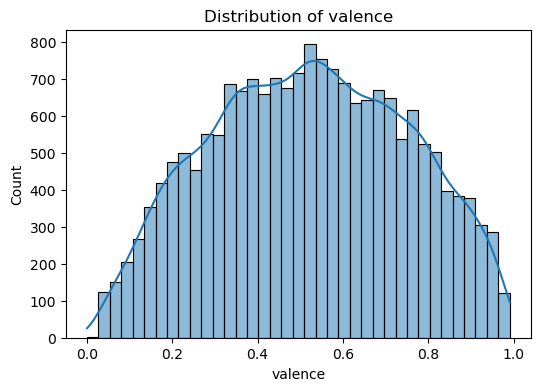

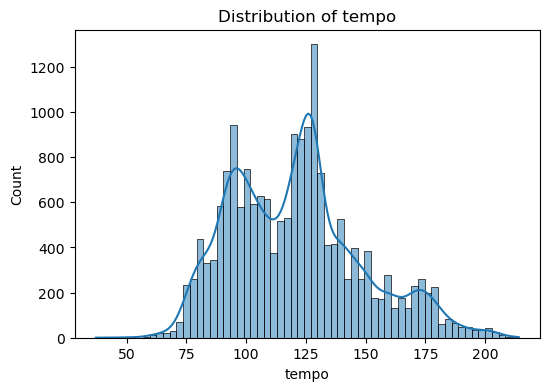

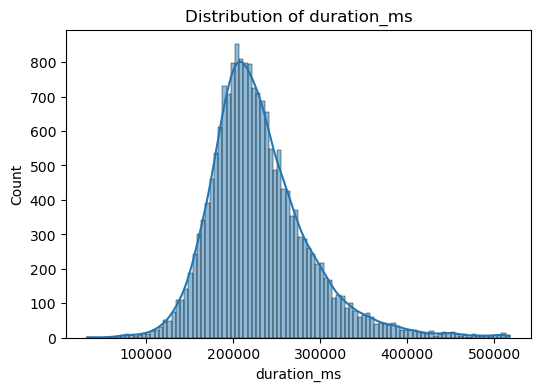

In [24]:
#Basic Distributions of Numerical Features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Missing Values
Missing data can compromise the reliability of models if left unaddressed. At this stage, we quantify the extent of missingness across features to determine whether it is systematic or random. Based on this assessment, we can decide between strategies such as imputation, removal of incomplete rows, or exclusion of certain features altogether. The approach chosen will depend on the amount of missingness and the importance of the affected variables to our predictive tasks; so in this case we will conduct a more general approach to handling missing values and be more specific in the development of our models.

In [ ]:
# Checking for missing values
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")

Column 'lyrics' has 260 missing values.
Column 'language' has 260 missing values.


In [17]:
# Checking for duplicates
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"There are {duplicate_count} duplicate rows in the dataset.")

#### Handling Outliers
Outliers can distort statistical measures and bias model performance, particularly for algorithms that assume linearity or rely on distance metrics. Here, we identify potential outliers using both visualization techniques (e.g., boxplots, histograms) and statistical methods such as the interquartile range (IQR). Whether these values represent true anomalies in the data or simply natural variation must be carefully considered. Decisions on whether to retain, transform, or remove outliers will be guided by the context of the features and their impact on subsequent analyses.

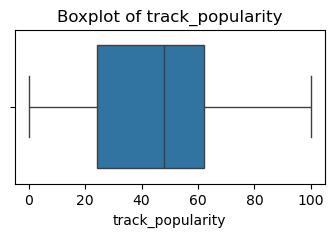

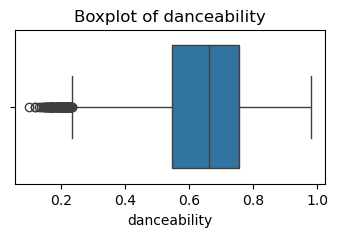

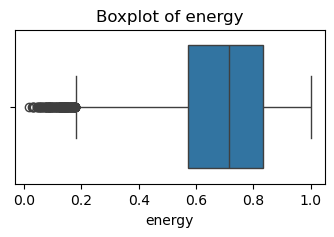

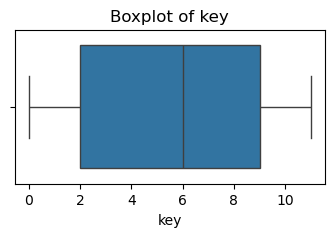

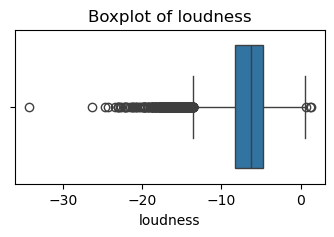

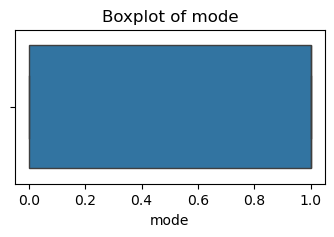

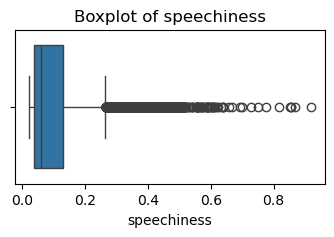

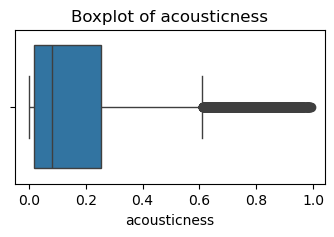

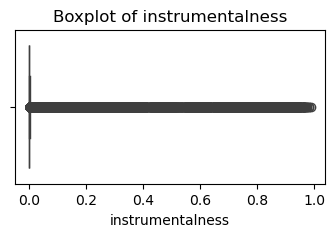

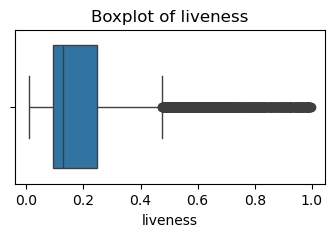

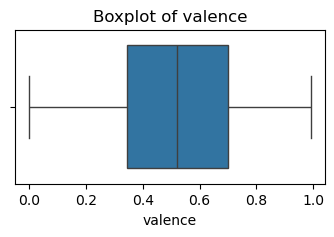

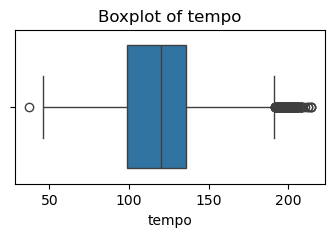

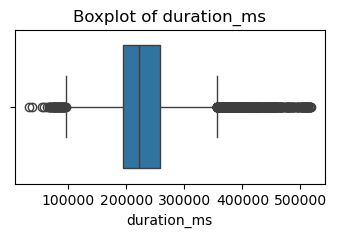

In [23]:
# Visualisting outliers using boxplots
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()